In [1]:
# identificar 4 drawdowns
# criar um grafico de calor com comparaçoes de janelas de investimento
# criadas a partir dos dds com intervalos de 6 meses, 12 meses 36m e 60m

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
acao = 'WEGE3.SA'
cotacoes = yf.download(acao, '2006-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [111]:
cotacoes = cotacoes.to_frame()
cotacoes

,Adj Close
Date,
2006-01-02,0.803308
2006-01-03,0.803308
2006-01-04,0.803308
2006-01-05,0.803308
2006-01-06,0.803308
...,...
2023-10-13,34.540001
2023-10-16,34.650002
2023-10-17,34.279999


In [112]:
cotacoes['ano'] = cotacoes.index.year
cotacoes['cummax_ano'] = cotacoes.groupby('ano').cummax()

In [113]:
cotacoes['quedas'] = (cotacoes['Adj Close'] / cotacoes['cummax_ano'] - 1) 
cotacoes

,Adj Close,ano,cummax_ano,quedas
Date,,,,
2006-01-02,0.803308,2006,0.803308,0.000000
2006-01-03,0.803308,2006,0.803308,0.000000
2006-01-04,0.803308,2006,0.803308,0.000000
2006-01-05,0.803308,2006,0.803308,0.000000
2006-01-06,0.803308,2006,0.803308,0.000000
...,...,...,...,...
2023-10-13,34.540001,2023,41.565281,-0.169018
2023-10-16,34.650002,2023,41.565281,-0.166372
2023-10-17,34.279999,2023,41.565281,-0.175273


In [114]:
maxdrawdown = cotacoes.groupby('ano')['quedas'].min().to_frame()
maxdrawdown.sort_values(['quedas']).head(6)

,quedas
ano,
2008,-0.597189
2020,-0.466677
2022,-0.354720
2021,-0.318399
2011,-0.316354
2015,-0.292097


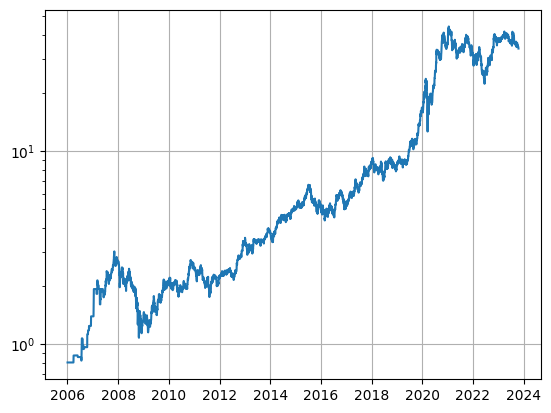

In [115]:
fig, ax = plt.subplots()
ax.plot(cotacoes['Adj Close'])
ax.grid(True)
ax.set_yscale('log')

In [121]:
cotacoes['cummax_total'] = cotacoes['Adj Close'].cummax()
cotacoes['quedas_total'] = cotacoes['Adj Close'] / cotacoes['cummax_total'] - 1

cotacoes['quedas_total'] = cotacoes['quedas_total'] *10

            Adj Close   ano  cummax_ano    quedas  cummax_total  quedas_total  \
Date                                                                            
2006-01-02   0.803308  2006    0.803308  0.000000      0.803308      0.000000   
2006-01-03   0.803308  2006    0.803308  0.000000      0.803308      0.000000   
2006-01-04   0.803308  2006    0.803308  0.000000      0.803308      0.000000   
2006-01-05   0.803308  2006    0.803308  0.000000      0.803308      0.000000   
2006-01-06   0.803308  2006    0.803308  0.000000      0.803308      0.000000   
...               ...   ...         ...       ...           ...           ...   
2023-10-13  34.540001  2023   41.565281 -0.169018     44.154266     -2.177426   
2023-10-16  34.650002  2023   41.565281 -0.166372     44.154266     -2.152513   
2023-10-17  34.279999  2023   41.565281 -0.175273     44.154266     -2.236311   
2023-10-18  34.290001  2023   41.565281 -0.175033     44.154266     -2.234046   
2023-10-19  33.939999  2023 

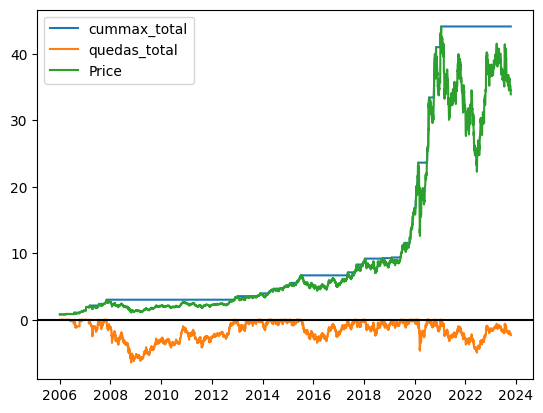

In [122]:
fig, ax = plt.subplots()
ax.plot(cotacoes['cummax_total'], label = "cummax_total")
ax.plot(cotacoes['quedas_total'], label = "quedas_total")
ax.plot(cotacoes['Adj Close'], label = "Price")

ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')

print(cotacoes)

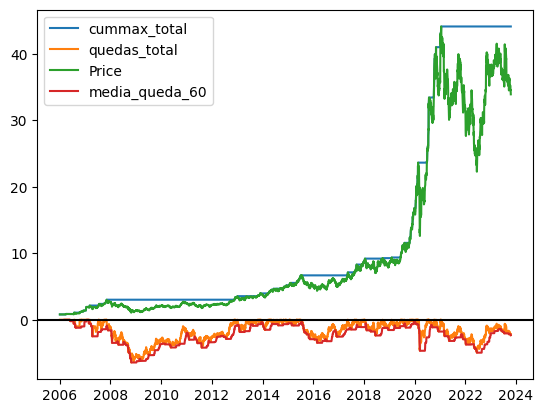

In [123]:
cotacoes['media_queda_60'] = cotacoes['quedas_total'].rolling(50).min().dropna()

fig, ax = plt.subplots()
ax.plot(cotacoes['cummax_total'], label = "cummax_total")
ax.plot(cotacoes['quedas_total'], label = "quedas_total")
ax.plot(cotacoes['Adj Close'], label = "Price")
ax.plot(cotacoes['media_queda_60'], label = "media_queda_60")

ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')

# print(cotacoes)

In [129]:
cot = cotacoes['media_queda_60'].dropna().drop_duplicates()
cot.groupby(cot.index.year).min()

Date
2006   -1.199995
2007   -2.488736
2008   -6.428981
2009   -6.230593
2010   -4.170144
2011   -4.196744
2012   -3.378356
2013   -1.836737
2014   -1.508601
2015   -2.920971
2016   -3.464173
2017   -2.498956
2018   -2.365165
2019   -1.431882
2020   -4.666772
2021   -3.183991
2022   -4.951014
2023   -2.313314
Name: media_queda_60, dtype: float64

<Axes: xlabel='Date'>

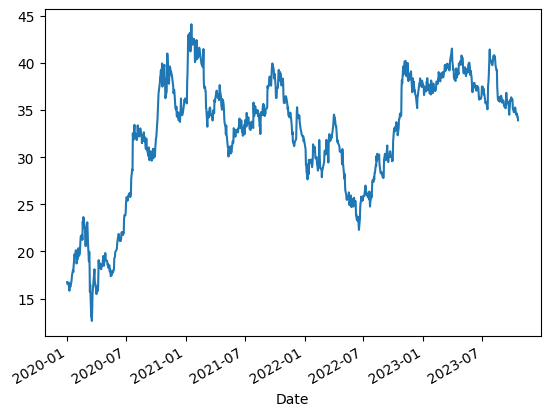

In [125]:
cotacoes[cotacoes.index.year >2019]['Adj Close'].plot()